<a href="https://colab.research.google.com/github/nancy-shehata/Machine-Learning-Colab/blob/social-network/Social_Network_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A.)
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("Social Network.csv")

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# C.)
data.drop(["User ID"], axis="columns",inplace=True)

In [ ]:
# D.)
X = data.drop(["Purchased"],axis="columns")

Y = data["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
X.Gender = X.Gender.map({"Male":0,"Female":1})
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [ ]:
X.Gender = X.Gender.fillna(X.Gender.mean())
X.Gender[0:10]

0    0
1    0
2    1
3    1
4    0
5    0
6    1
7    1
8    0
9    1
Name: Gender, dtype: int64

In [ ]:
X.Age[0:10]

0    19
1    35
2    26
3    27
4    19
5    27
6    27
7    32
8    25
9    35
Name: Age, dtype: int64

In [ ]:
train_test_split(X,Y,train_size = 0.8)

[     Gender  Age  EstimatedSalary
 162       1   37            33000
 225       0   37            53000
 373       0   59           130000
 258       1   58            95000
 293       0   37            77000
 ..      ...  ...              ...
 278       1   52            38000
 338       1   38            55000
 377       1   42            53000
 114       0   42            80000
 118       0   40            59000
 
 [320 rows x 3 columns],
      Gender  Age  EstimatedSalary
 39        1   27            31000
 347       1   54           108000
 171       0   34           115000
 381       0   48            33000
 327       1   42            75000
 ..      ...  ...              ...
 305       0   42            54000
 312       1   38            50000
 38        1   26            72000
 136       1   20            82000
 275       0   57            74000
 
 [80 rows x 3 columns],
 162    0
 225    0
 373    1
 258    1
 293    0
       ..
 278    1
 338    0
 377    0
 114    0
 118   

In [ ]:
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)

len(X_train)

320

In [ ]:
len(X_test)

80

In [ ]:
X_test

,Gender,Age,EstimatedSalary
131,0,33,31000
162,1,37,33000
147,1,41,30000
188,0,35,72000
190,0,24,84000
...,...,...,...
204,1,58,101000
253,1,37,146000
64,1,59,83000
45,0,23,20000


In [ ]:
model_dt = tree.DecisionTreeClassifier(max_depth=3)   #model with deph 3
model_dt

DecisionTreeClassifier(max_depth=3)

In [ ]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model_dt.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

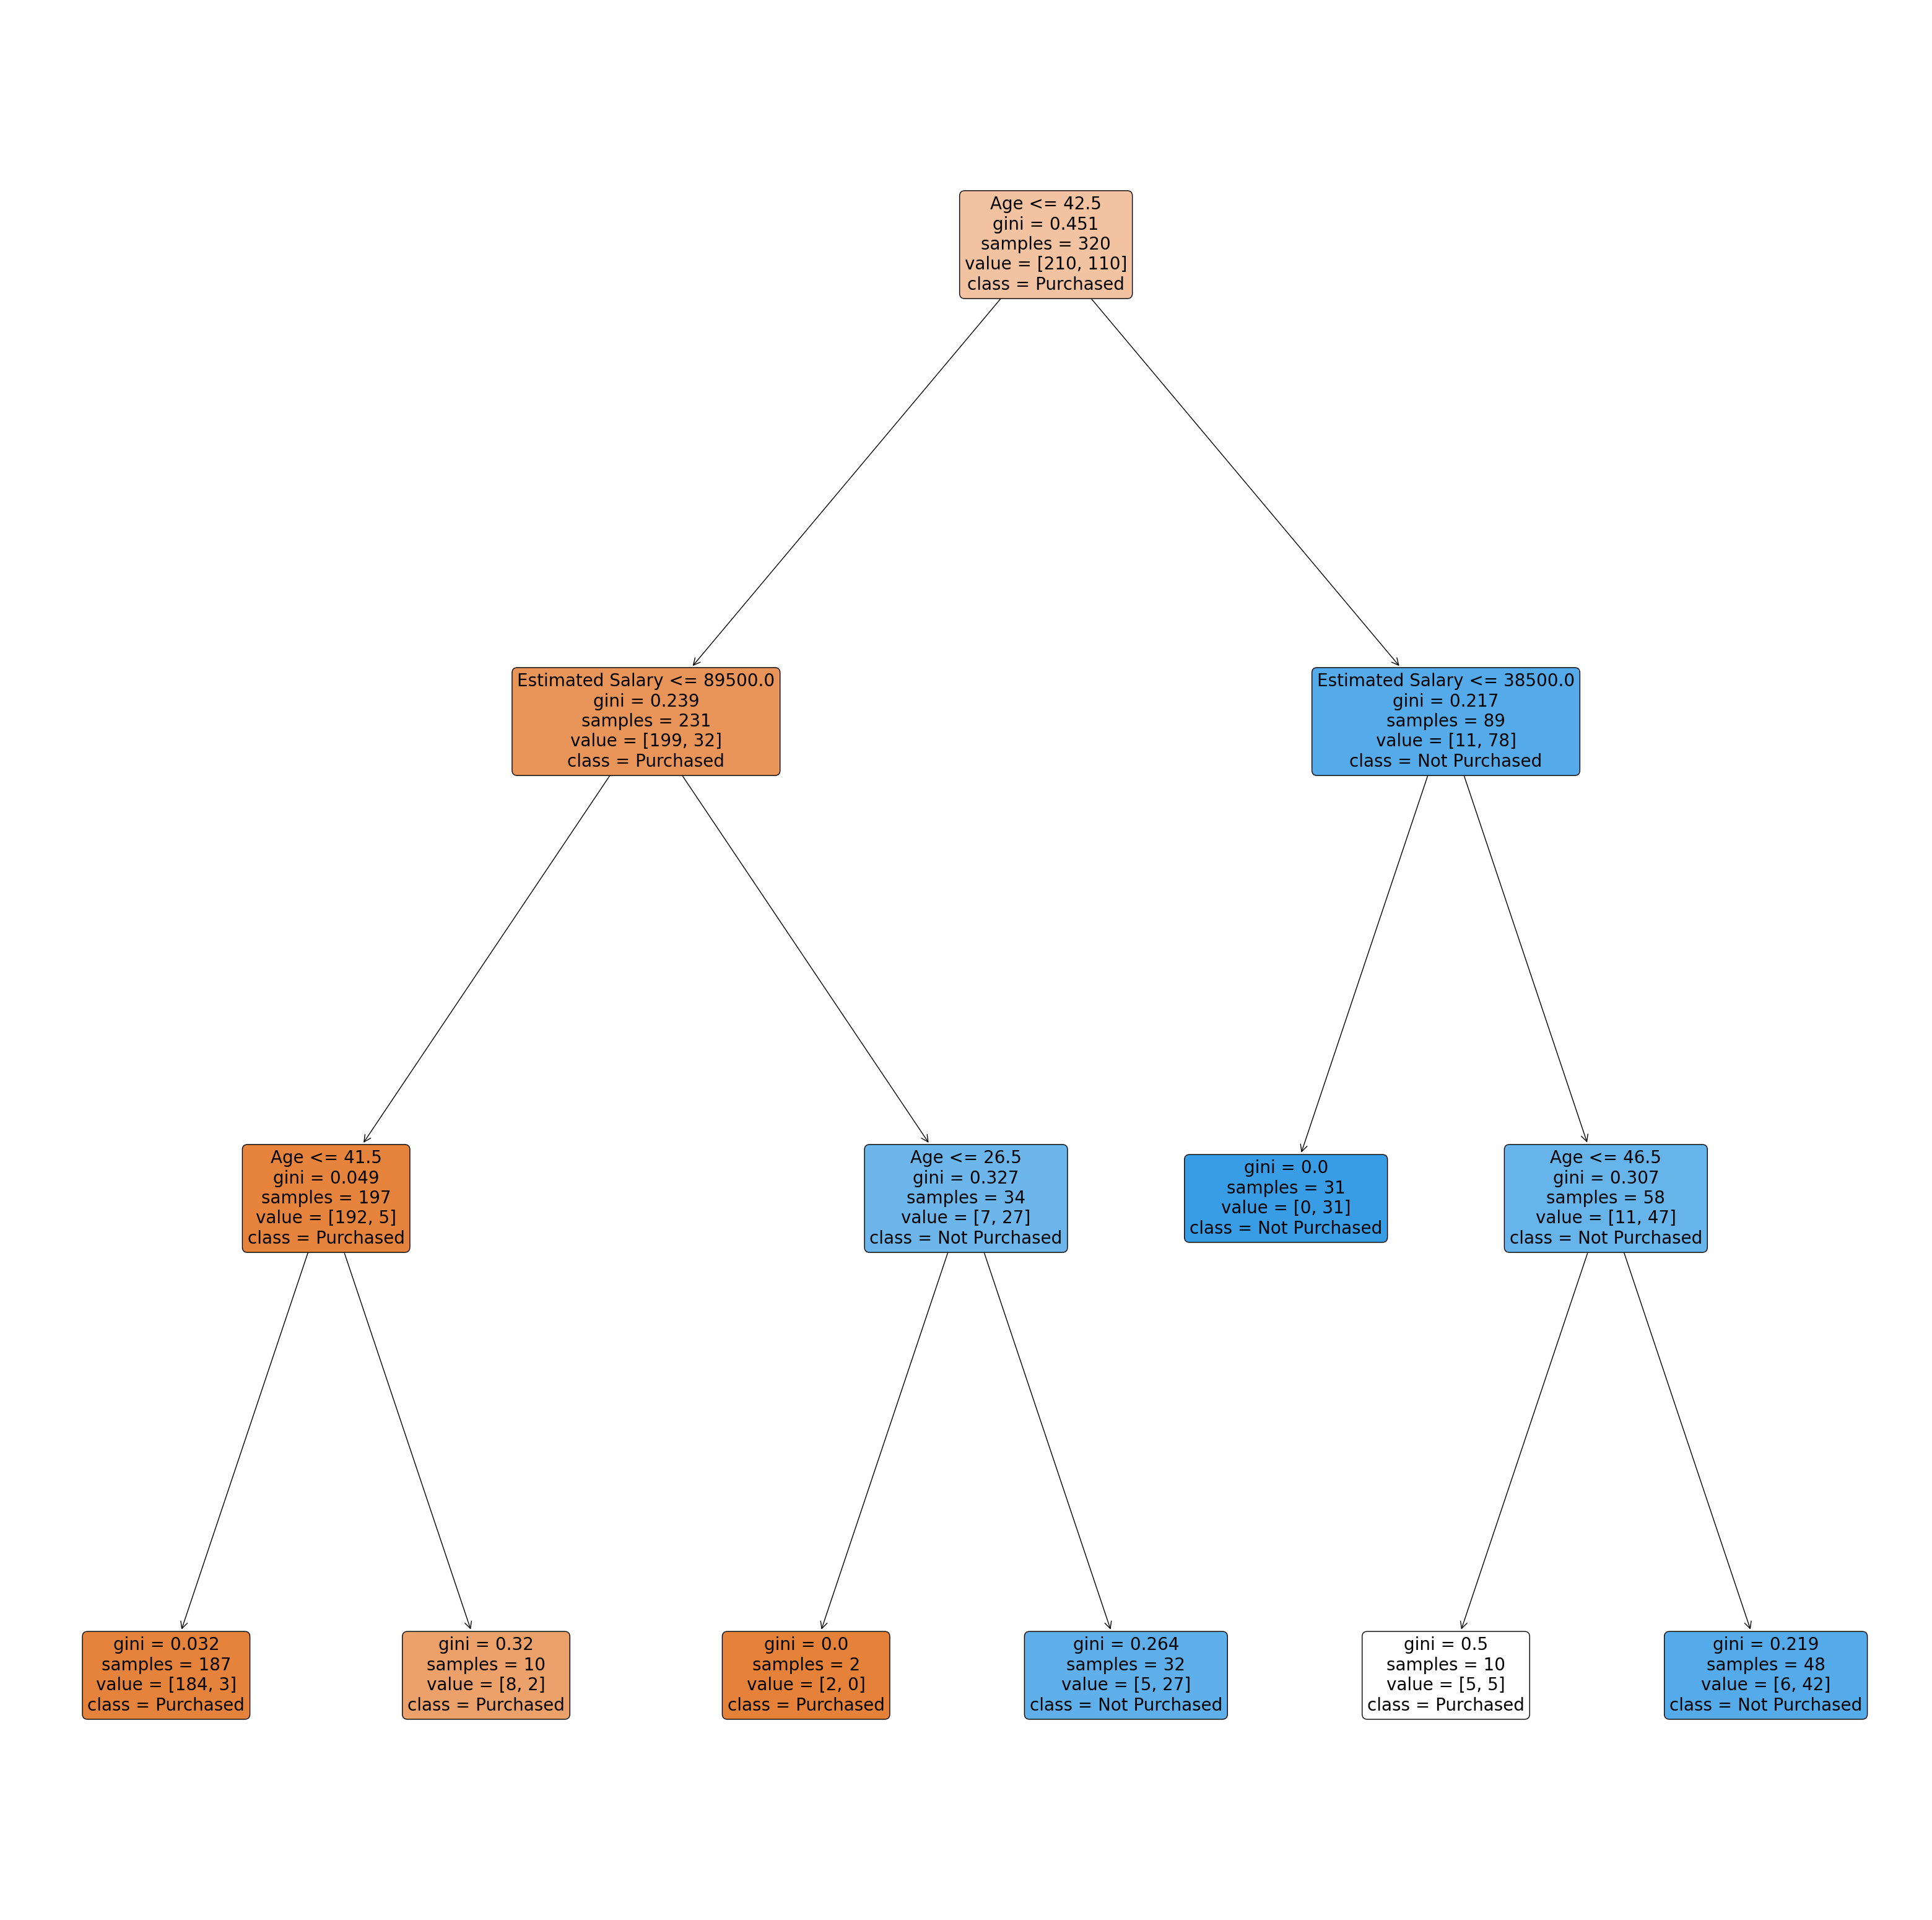

In [ ]:
plt.figure(figsize=(40,40))
graph_tree = plot_tree (model_dt,feature_names = ['Gender','Age','Estimated Salary'],
                        class_names = ['Purchased','Not Purchased'],
                        filled=True,rounded=True,fontsize = 20)

In [ ]:
# H.)
accuracy_dt = model_dt.score(X_test,Y_real)
accuracy_dt

0.825

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)
accuracy

0.825

In [ ]:
# Precision
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)
precision_dt

0.7878787878787878

In [ ]:
# ROC curve
roc_dt=metrics.precision_score(Y_real,Y_pred_dt)
roc_dt

0.7878787878787878

In [ ]:
#Confusion Matrix
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[40,  7],
       [ 7, 26]])

<Axes: >

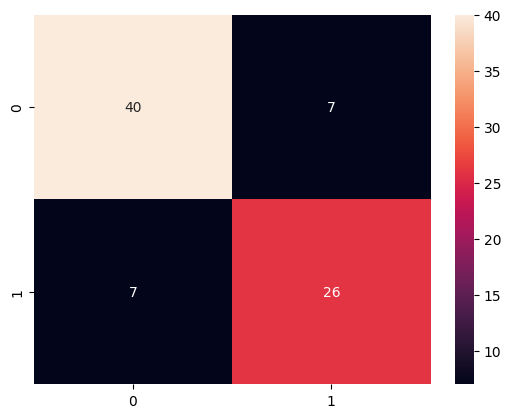

In [ ]:
sns.heatmap(confusion_matrix_dt, annot=True)

In [ ]:
#K fold Cross Validation
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kf_dt = KFold(n_splits=5,shuffle=True)
cv_dt = cross_val_score(model_dt, X, Y,cv= kf_dt)
np.mean(cv_dt)

0.89

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression(solver='liblinear')

In [ ]:
model_lr.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_lg = model_lr.predict(X_test)
y_pred_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Accuracy
accuracy_lg = model_lr.score(X_test,Y_real)
accuracy_lg

0.5875

In [ ]:
#Recall
rec_lg = metrics.recall_score(Y_real, y_pred_lg)
rec_lg

0.0

In [ ]:
# Precision
acc_lg = metrics.accuracy_score(Y_real,y_pred_lg)
acc_lg

0.5875

In [ ]:
#ROC Curve
auc_lg = metrics.roc_auc_score(Y_real, y_pred_lg)
auc_lg

0.5

In [ ]:
#Confsuion Matrix
cm_lg = metrics.confusion_matrix(Y_real,y_pred_lg)
cm_lg

array([[47,  0],
       [33,  0]])

<Axes: >

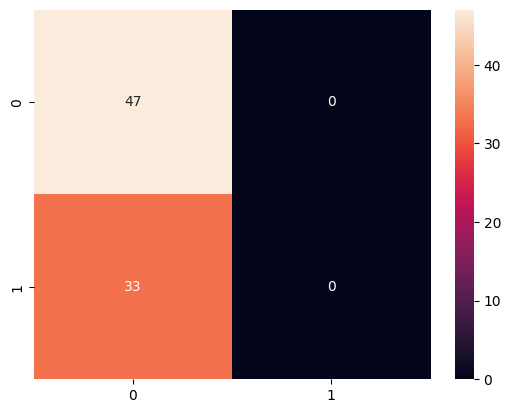

In [ ]:
import seaborn as sns
sns.heatmap(cm_lg, annot=True)

In [ ]:
#K fold Cross Validation
kf_lg = KFold(n_splits=5,shuffle=True)

In [ ]:
cv_lg = cross_val_score(model_lr, X, Y, cv=kf_lg)
np.mean(cv_lg)

0.6425000000000001